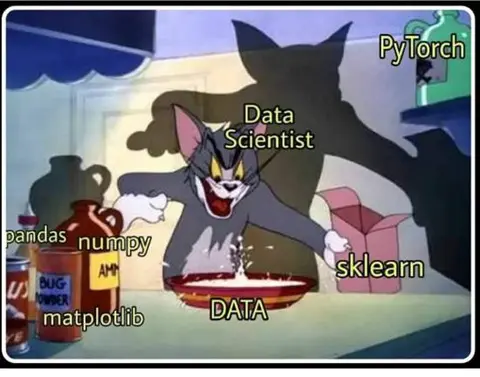

#Подготовка данных (Data Preparation)
- это процесс обработки и преобразования данных перед их использованием в анализе или моделировании в рамках задачи в области науки о данных (Data Science) и машинного обучения (Machine Learning). Этот процесс играет критическую роль в успехе любого проекта по анализу данных, поскольку качество данных напрямую влияет на качество итоговых результатов.

Вот несколько основных шагов подготовки данных и их значение:

1. **Очистка данных (Data Cleaning)**:
   - Удаление или заполнение пропущенных значений.
   - Обработка дубликатов.
   - Коррекция ошибок данных и аномалий.
   - Обработка выбросов.

2. **Преобразование данных (Data Transformation)**:
   - Масштабирование признаков (например, стандартизация или нормализация).
   - Преобразование категориальных переменных в числовые (например, с использованием кодирования категорий).
   - Преобразование формата данных (например, даты и времени).
   - Создание новых признаков на основе существующих (Feature Engineering).

3. **Выбор признаков (Feature Selection)**:
   - Отбор наиболее важных признаков для моделирования.
   - Исключение нерелевантных или избыточных признаков.

4. **Обработка несбалансированных классов (Handling Imbalanced Classes)**:
   - Применение методов сэмплирования для балансировки классов (например, андерсэмплинг или оверсэмплинг).

5. **Разделение данных (Data Splitting)**:
   - Разделение данных на обучающую, валидационную и тестовую выборки для оценки качества модели.

6. **Нормализация данных (Data Normalization)**:
   - Приведение данных к стандартным или равномерным распределениям.
   
7. **Удаление шума (Noise Reduction)**:
   - Удаление лишних данных, которые могут помешать модели.

8. **Обработка временных рядов (Time Series Processing)**:
   - Выравнивание данных по времени.
   - Извлечение признаков из временных данных.

Цель подготовки данных - создать чистый, структурированный и подходящий для анализа набор данных, который позволит получить максимальную информацию из него и построить качественные модели машинного обучения или провести анализ данных.

Для проведения наших экспериментов мы будем использовать набор данных о ценах на жилье в России.
https://drive.google.com/file/d/1rVVMjbsXLlOaWqkef0V-zPoINi1DaMeK/view?usp=sharing


Мы не планируем полностью очищать весь набор данных, однако рассмотрим основные методы и операции на его основе.

Прежде чем мы начнем процесс очистки данных, важно ознакомиться с исходным датасетом. Давайте рассмотрим сами данные:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# импорт пакетов
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# чтение данных
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sberbank.csv')

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(7662, 291)
id                      int64
timestamp              object
full_sq               float64
life_sq               float64
floor                   int64
                       ...   
church_count_5000       int64
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
Length: 291, dtype: object
['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_m

Этот код показывает нам, что набор данных состоит из 7662 строки и 291 столбец. Мы видим, являются ли эти столбцы числовыми или категориальными признаками.

Теперь мы можем пройдемся по ключевым проблемам данных и исправим их.

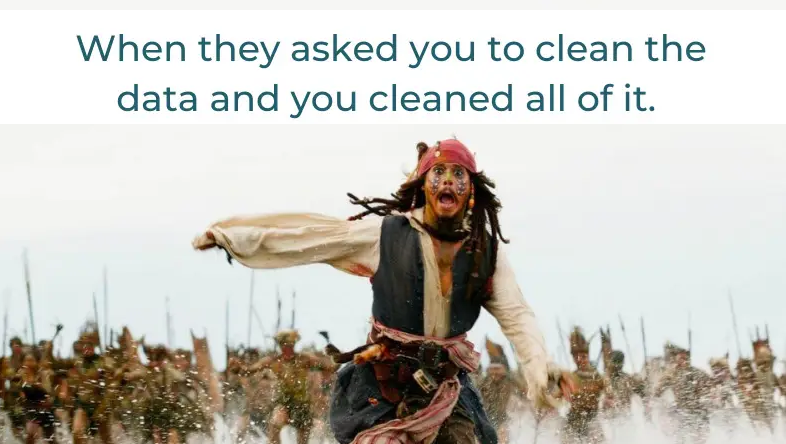

#1. Отсутствующие данные
Отсутствующие значения – одна из самых сложных, но и самых распространенных проблем.

##1.1. Как обнаружить?
Рассмотрим три метода обнаружения отсутствующих данных в наборе.

###1.1.1. Тепловая карта пропущенных значений
Когда признаков в наборе не очень много, визуализируйте пропущенные значения с помощью тепловой карты.

<Axes: >

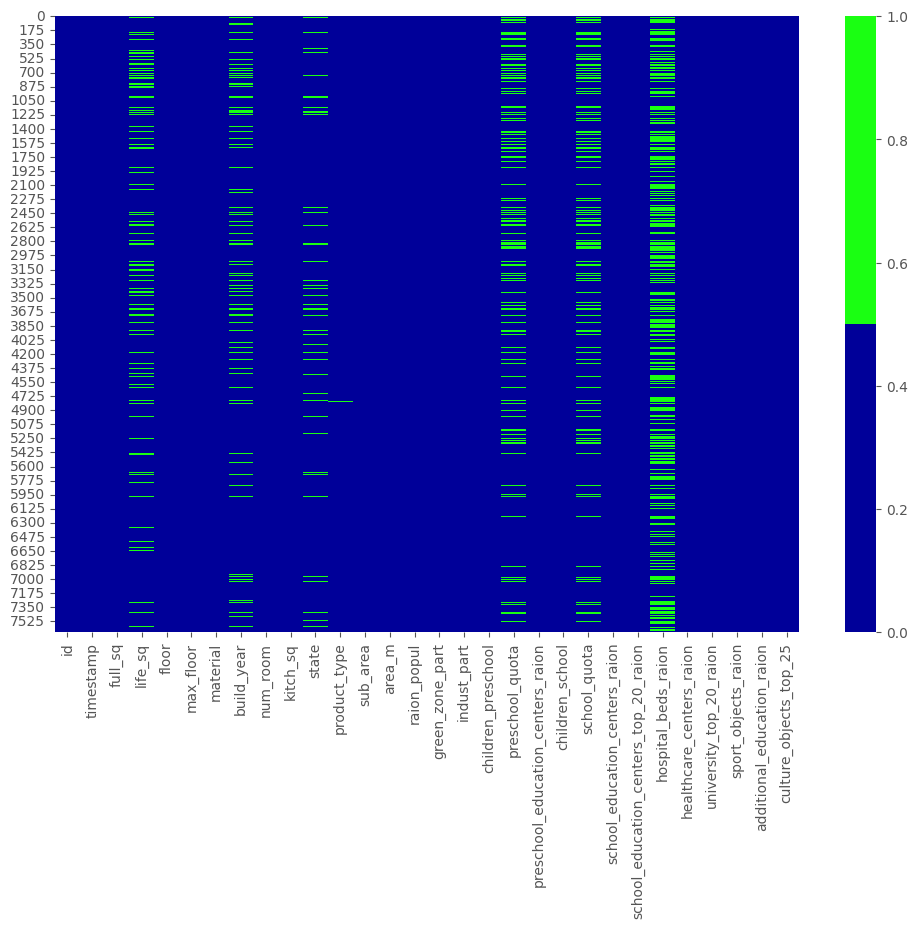

In [ ]:
cols = df.columns[:30] # первые 30 колонок
# определяем цвета
# зеленый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#1aff12']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

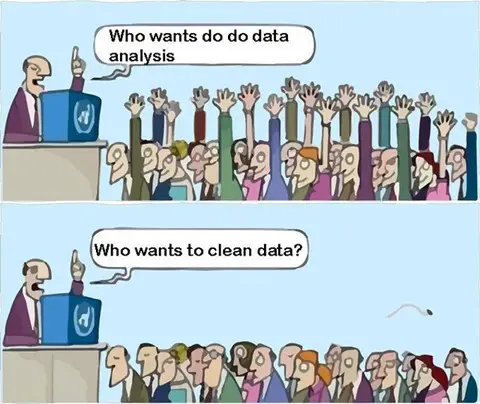

###1.1.2. Процентный список пропущенных данных
Если в наборе много признаков и визуализация занимает много времени, можно составить список долей отсутствующих записей для каждого признака.

In [ ]:
#Введите свой код здесь:




In [ ]:
#@title Проверьте себя:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
timestamp - 0%
full_sq - 0%
life_sq - 15%
floor - 0%
max_floor - 0%
material - 0%
build_year - 14%
num_room - 0%
kitch_sq - 0%
state - 9%
product_type - 0%
sub_area - 0%
area_m - 0%
raion_popul - 0%
green_zone_part - 0%
indust_part - 0%
children_preschool - 0%
preschool_quota - 21%
preschool_education_centers_raion - 0%
children_school - 0%
school_quota - 21%
school_education_centers_raion - 0%
school_education_centers_top_20_raion - 0%
hospital_beds_raion - 45%
healthcare_centers_raion - 0%
university_top_20_raion - 0%
sport_objects_raion - 0%
additional_education_raion - 0%
culture_objects_top_25 - 0%
culture_objects_top_25_raion - 0%
shopping_centers_raion - 0%
office_raion - 0%
thermal_power_plant_raion - 0%
incineration_raion - 0%
oil_chemistry_raion - 0%
radiation_raion - 0%
railroad_terminal_raion - 0%
big_market_raion - 0%
nuclear_reactor_raion - 0%
detention_facility_raion - 0%
full_all - 0%
male_f - 0%
female_f - 0%
young_all - 0%
young_male - 0%
young_female - 0%
wor

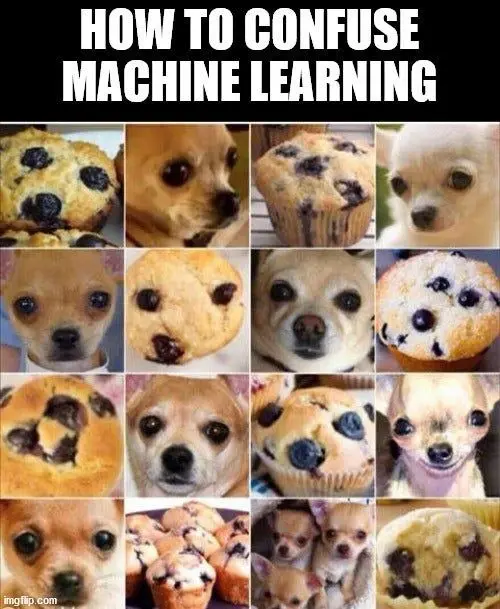

###1.1.3. Гистограмма пропущенных данных
Еще одна хорошая техника визуализации для наборов с большим количеством признаков – построение гистограммы для числа отсутствующих значений в записи.

##Три этапа построения гистограммы

1. **Создание индикаторов пропущенных значений**:
   ```python
    for col in df.columns:
        missing = df[col].isnull()
        num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
   ```
   - Этот блок кода проходится по каждому столбцу `col` в датафрейме `df`.
   - `missing = df[col].isnull()` создает булеву маску для пропущенных значений в столбце.
   - `num_missing = np.sum(missing)` вычисляет количество пропущенных значений в столбце.
   - Если `num_missing > 0`, то выводится сообщение о создании индикатора пропущенных значений для столбца `col`, и затем создается новый столбец в датафрейме с именем `{}_ismissing`, который содержит булевы значения пропущенных значений.

2. **Подсчет общего числа пропущенных значений**:
   ```python
    ismissing_cols = [col for col in df.columns if 'ismissing' in col]
    df['num_missing'] = df[ismissing_cols].sum(axis=1)
   ```
   - `ismissing_cols = [col for col in df.columns if 'ismissing' in col]` создает список столбцов, содержащих индикаторы пропущенных значений.
   - `df['num_missing'] = df[ismissing_cols].sum(axis=1)` создает новый столбец `num_missing`, который содержит общее количество пропущенных значений для каждой строки путем суммирования индикаторов пропущенных значений по всем столбцам.

3. **Визуализация количества пропущенных значений**:
   ```python
  # Создание DataFrame для гистограммы
  num_missing_counts = df['num_missing'].value_counts().reset_index()
  num_missing_counts.columns = ['num_missing_values', 'count']
  num_missing_counts = num_missing_counts.sort_values(by='num_missing_values')

  # Вывод таблицы с пропущенными значениями
  missing_table = df.isnull().sum().reset_index()
  missing_table.columns = ['column', 'num_missing']
  missing_table = missing_table[missing_table['num_missing'] > 0]
  print("Таблица с количеством пропущенных значений в каждом столбце:")
  print(missing_table)

  # Построение гистограммы
  plt.figure(figsize=(10, 6))
  plt.bar(num_missing_counts['num_missing_values'], num_missing_counts['count'], color='skyblue')
  plt.xlabel('Number of Missing Values per Row')
  plt.ylabel('Number of Rows')
  plt.title('Histogram of Missing Values per Row')
  plt.xticks(num_missing_counts['num_missing_values'])  # Установить метки по оси X для всех значений
  plt.show()
   ```


In [ ]:
#Запустите свой код здесь



created missing indicator for: life_sq
created missing indicator for: build_year
created missing indicator for: state
created missing indicator for: product_type
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raion_build_count_with_builddate_info
created missing indicator for: build_count_before_1920
created missing indicator for: build_count_1921-1945
created miss

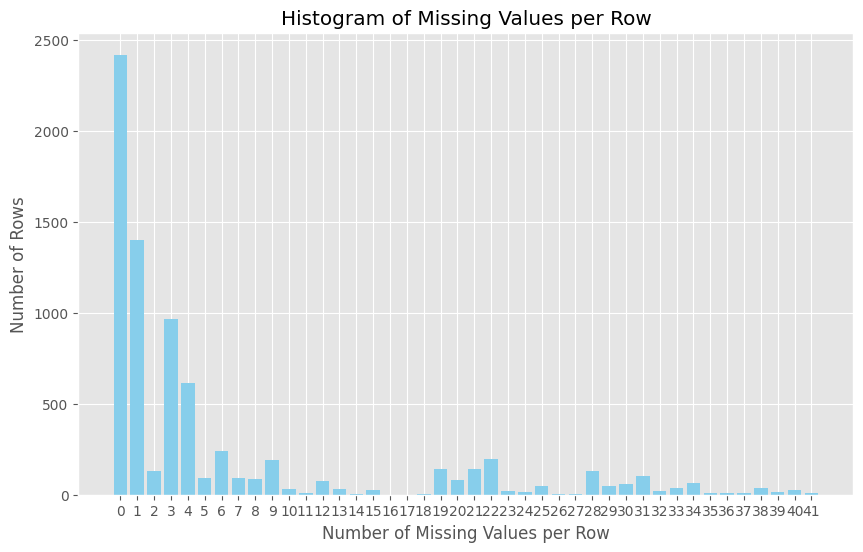

In [ ]:
#@title Проверьте себя:
# Создание индикаторов пропущенных значений
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

# Построение гистограммы количества пропущенных значений
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

# Создание DataFrame для гистограммы
num_missing_counts = df['num_missing'].value_counts().reset_index()
num_missing_counts.columns = ['num_missing_values', 'count']
num_missing_counts = num_missing_counts.sort_values(by='num_missing_values')

# Вывод таблицы с пропущенными значениями
missing_table = df.isnull().sum().reset_index()
missing_table.columns = ['column', 'num_missing']
missing_table = missing_table[missing_table['num_missing'] > 0]
print("Таблица с количеством пропущенных значений в каждом столбце:")
print(missing_table)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.bar(num_missing_counts['num_missing_values'], num_missing_counts['count'], color='skyblue')
plt.xlabel('Number of Missing Values per Row')
plt.ylabel('Number of Rows')
plt.title('Histogram of Missing Values per Row')
plt.xticks(num_missing_counts['num_missing_values'])  # Установить метки по оси X для всех значений
plt.show()


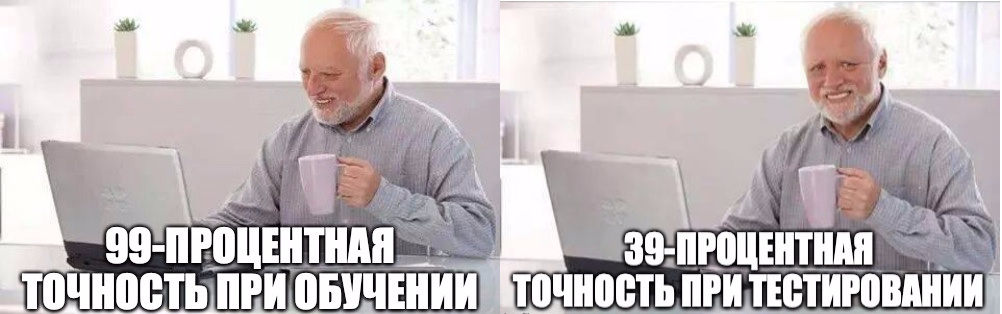

##1.2. Что делать с пропущенными значениями?
Существуют четыре самых распространенных техники.

###1.2.1. Отбрасывание записей
Первая техника в статистике называется методом удаления по списку и заключается в простом отбрасывании записи, содержащей пропущенные значения. Это решение подходит только в том случае, если недостающие данные не являются информативными.

Для отбрасывания можно использовать и другие критерии. Например, из гистограммы, построенной в предыдущем разделе, мы узнали, что лишь небольшое количество строк содержат более 35 пропусков. Мы можем создать новый набор данных df_less_missing_rows, в котором отбросим эти строки.

In [ ]:
#Запустите свой код здесь



In [ ]:
#@title Проверьте себя:
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

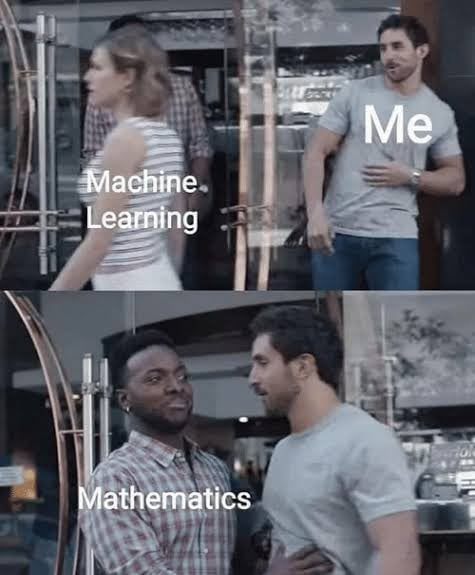

###1.2.2. Отбрасывание признаков

**NB!** Отбрасывание признаков может применяться только для неинформативных признаков.

В процентном списке, построенном ранее, мы увидели, что признак hospital_beds_raion имеет высокий процент недостающих значений. Мы можем полностью отказаться от этого признака:

In [ ]:
#Запустите свой код здесь



In [ ]:
#@title Проверьте себя:
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

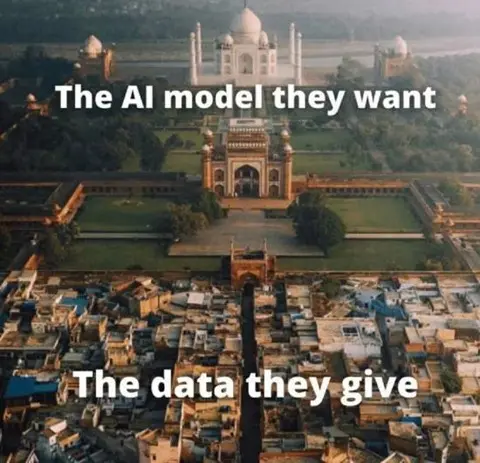

###1.2.3. Внесение недостающих значений

Для численных признаков можно воспользоваться методом статистического или вероятностного заполнения пропусков. Например, на место пропуска можно записать среднее или медианное значение, полученное из остальных записей.

Для категориальных признаков можно использовать в качестве заполнителя наиболее часто встречающееся значение.

Возьмем для примера признак life_sq и заменим все недостающие значения медианой этого признака:

In [ ]:
#Запустите свой код здесь



In [ ]:
#@title Проверьте себя:
med = df['life_sq'].median()
print(med)
df['life_sq'] = df['life_sq'].fillna(med)

30.4


In [ ]:
df['life_sq']

0       20.7
1       30.4
2       25.1
3       36.0
4       40.0
        ... 
7657    31.8
7658    30.4
7659     1.0
7660    19.8
7661    43.8
Name: life_sq, Length: 7662, dtype: float64

А теперь примените ту же стратегию  заполнения сразу для всех числовых признаков:

In [ ]:
#Запустите свой код здесь



In [ ]:
#@title Проверьте себя:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: build_year
imputing missing values for: state
imputing missing values for: preschool_quota
imputing missing values for: school_quota
imputing missing values for: hospital_beds_raion
imputing missing values for: raion_build_count_with_material_info
imputing missing values for: build_count_block
imputing missing values for: build_count_wood
imputing missing values for: build_count_frame
imputing missing values for: build_count_brick
imputing missing values for: build_count_monolith
imputing missing values for: build_count_panel
imputing missing values for: build_count_foam
imputing missing values for: build_count_slag
imputing missing values for: build_count_mix
imputing missing values for: raion_build_count_with_builddate_info
imputing missing values for: build_count_before_1920
imputing missing values for: build_count_1921-1945
imputing missing values for: build_count_1946-1970
imputing missing values for: build_count_1971-1995
imputing missing values for: 

... и для категориальных признаков:


In [ ]:
#Запустите свой код здесь



In [ ]:
#@title Проверьте себя:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

imputing missing values for: product_type


###1.2.4. Замена недостающих значений

Еще один популярный метод - использование "дефолтого" плейсхолдера для пропусков, например, создать новую категорию _MISSING_ для категориальных признаков или число -999 для числовых.

Таким образом, мы **сохраняем данные** о пропущенных значениях, что тоже может быть ценной информацией.

In [ ]:
# категориальные признаки
df['sub_area'] = df['sub_area'].fillna('_MISSING_')

# численные признаки
df['life_sq'] = df['life_sq'].fillna(-999)

#2. Нетипичные данные (выбросы)
Выбросы – это данные, которые существенно отличаются от других наблюдений. Они могут соответствовать реальным отклонениям, но могут быть и просто ошибками.

##2.1. Как обнаружить выбросы?
Для численных и категориальных признаков используются разные методы изучения распределения, позволяющие обнаружить выбросы.

###2.1.1. Гистограмма/коробчатая диаграмма
Если признак численный, можно построить гистограмму или коробчатую диаграмму (ящик с усами). Посмотрим на примере уже знакомого нам признака life_sq.

<Axes: >

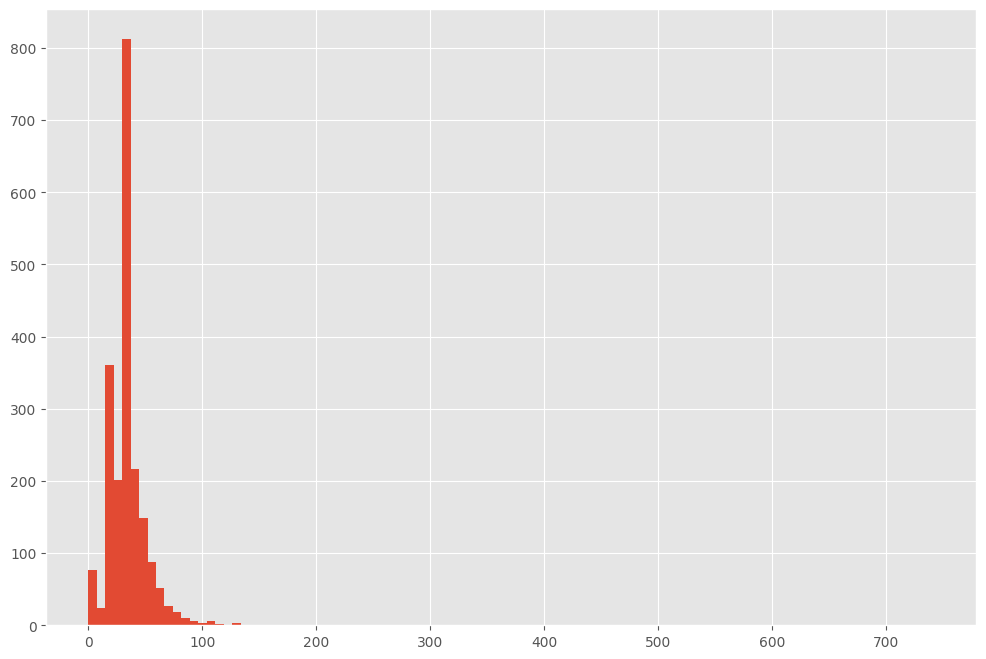

In [ ]:
df['life_sq'].hist(bins=100)

Чтобы изучить особенность поближе, построим еще одну диаграмму.

<Axes: >

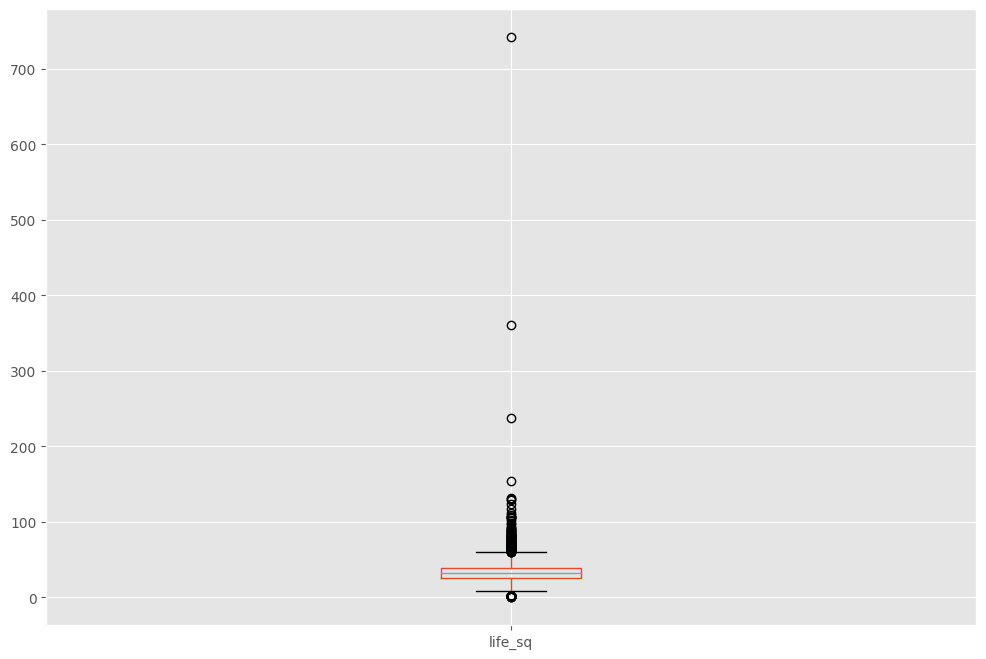

In [ ]:
df.boxplot(column=['life_sq'])

Видим, что есть несколько выбросов...

###2.1.2. Описательная статистика
Отклонения численных признаков могут быть слишком четкими, чтобы не визуализироваться коробчатой диаграммой. Вместо этого можно проанализировать их описательную статистику.

Например, используйте describe() для признака life_sq. Что вы видите?

In [ ]:
#Запустите свой код здесь



In [ ]:
#@title Проверьте себя:
df['life_sq'].describe()

count    7662.000000
mean       32.313156
std        20.935861
min         0.000000
25%        20.800000
50%        30.400000
75%        38.600000
max       869.000000
Name: life_sq, dtype: float64

###2.1.3. Столбчатая диаграмма
Для категориальных признаков можно построить столбчатую диаграмму – для визуализации данных о категориях и их распределении.

Например, распределение признака ecology вполне равномерно и допустимо.

In [ ]:

df['ecology'].value_counts().plot.bar()

###2.1.4. Другие методы

Для обнаружения выбросов можно использовать другие методы, например, построение точечной диаграммы, z-оценку или кластеризацию. На этом занятии они не рассматриваются.

##2.2. Что делать?

Выбросы довольно просто обнаружить, но выбор способа их устранения слишком существенно зависит от специфики набора данных и целей проекта.
Их обработка во многом похожа на обработку пропущенных данных, которую мы разбирали в предыдущем разделе.
Можно удалить записи или признаки с выбросами, либо скорректировать их, либо оставить без изменений, но учесть при интерпретации результатов.

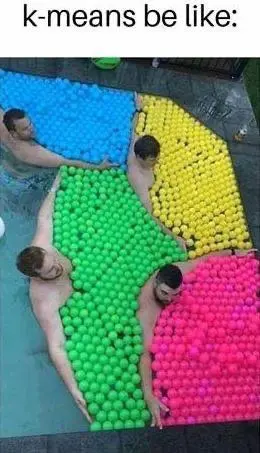

Многие задачи DS & ML требуют от нас избавлятся от информации, если если она не добавляет никакой ценности.

Три основных типа «ненужных» данных:

- неинформативные признаки с большим количеством одинаковых значений,

- нерелевантные признаки,

- дубликаты записей.


Рассмотрим работу с каждым типом «ненужных» данных отдельно.

#3. Неинформативные признаки
Если признак имеет слишком много строк с одинаковыми значениями, он не несет полезной информации для проекта.

##3.1. Как обнаружить?
Давайте составим список признаков, у которых более 95% строк содержат одно и то же значение.

In [ ]:
#Запустите свой код здесь



In [ ]:
#@title Проверьте себя:
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

incineration_raion: 96.68454%
no     5949
yes     204
Name: incineration_raion, dtype: int64

oil_chemistry_raion: 99.23614%
no     6106
yes      47
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 95.80692%
no     5895
yes     258
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.00959%
no     5969
yes     184
Name: nuclear_reactor_raion, dtype: int64

build_count_foam: 95.77442%
0.0     5893
1.0      157
11.0      55
2.0       48
Name: build_count_foam, dtype: int64

big_road1_1line: 95.57939%
no     5881
yes     272
Name: big_road1_1line, dtype: int64

railroad_1line: 96.73330%
no     5952
yes     201
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.10710%
0    5975
1     176
2       2
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.28490%
0    6109
1      44
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.01056%
0.0    5846
1.0     263
2.0      22
3.0      10
4.0       6
5.0       5
6.0 

##3.2. Что делать?
Если после анализа причин получения повторяющихся значений вы пришли к выводу, что признак не несет полезной информации, используйте drop().

In [ ]:
#Запустите свой код здесь



#4. Нерелевантные признаки

Нерелевантные признаки обнаруживаются ручным отбором и оценкой значимости.

Например, признак, регистрирующий температуру на Марсе  точно не имеет никакого отношения к прогнозированию цен на российское жилье. Если признак не имеет значения для проекта, его нужно исключить.

В нашем датасете есть такие признаки?

#5. Дубликаты записей

Если значения признаков (всех или большинства) в двух разных записях совпадают, эти записи называются дубликатами.

##5.1. Как обнаружить повторяющиеся записи?

Способ обнаружения дубликатов зависит от того, что именно мы считаем дубликатами.

Например, в случае когда в наборе данных есть уникальный идентификатор id.

Если две записи имеют одинаковый id, мы считаем, что это одна и та же запись.

Удалим все неуникальные записи:

In [ ]:
#Запустите свой код здесь



In [ ]:
#@title Проверьте себя:
# отбрасываем неуникальные строки
df_dedupped = df.drop('id', axis=1).drop_duplicates()

# сравниваем формы старого и нового наборов
print(df.shape)
print(df_dedupped.shape)

Другой распространенный способ вычисления дубликатов: по набору ключевых признаков.

Например, неуникальными можно считать записи с одной и той же площадью жилья и годом постройки.

Найдем в нашем наборе дубликаты по группе критических признаков – full_sq,life_sq, floor, build_year, num_room.

In [ ]:
#Запустите свой код здесь




In [ ]:
#@title Проверьте себя:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room']

df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(20)

##5.2. Что делать с дубликатами?

Очевидно, что повторяющиеся записи нам не нужны, значит, их нужно исключить из набора.

In [ ]:
#Запустите свой код здесь




In [ ]:
#@title Проверьте себя:

key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

Большая проблема очистки данных – разные форматы записей. Для корректной работы модели важно, чтобы набор данных соответствовал определенным стандартам – необходимо тщательное исследование с учетом специфики самих данных. Мы рассмотрим четыре самых распространенных несогласованности:

- Разные регистры символов.
- Разные форматы данных (например, даты).
- Опечатки в значениях категориальных признаков.
- Адреса.

#6. Разные регистры символов
Непоследовательное использование разных регистров в категориальных значениях является очень распространенной ошибкой, которая может существенно повлиять на анализ данных.

##6.1. Как обнаружить?
Давайте посмотрим на признак sub_area:

In [ ]:
df['sub_area'].value_counts(dropna=False)

Если в какой-то записи вместо Poselenie Sosenskoe окажется poselenie sosenskoe, они будут расценены как два разных значения.
Нас это не устраивает.

##6.2. Что делать?
Эта проблема легко решается принудительным изменением регистра:

In [ ]:
#Запустите свой код здесь




In [ ]:
#@title Проверьте себя:
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

#7. Разные форматы данных
Ряд данных в наборе находится не в том формате, с которым нам было бы удобно работать. Например, даты, записанные в виде строки, следует преобразовать в формат DateTime.

##7.1. Как обнаружить?
Признак timestamp представляет собой строку, хотя является датой:

In [ ]:
print (df['timestamp'])

0       2015-07-01
1       2015-07-01
2       2015-07-01
3       2015-07-01
4       2015-07-01
           ...    
7657    2016-05-26
7658    2016-05-28
7659    2016-05-30
7660    2016-05-30
7661    2016-05-30
Name: timestamp, Length: 7662, dtype: object


##7.2. Что же делать?

Чтобы было проще анализировать транзакции по годам и месяцам, значения признака timestamp следует преобразовать в удобный формат:


In [ ]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

year
2016    3983
2015    3679
Name: count, dtype: int64

month
2     1234
3     1035
12     897
1      827
11     724
4      685
9      595
10     563
8      504
7      396
5      202
Name: count, dtype: int64


<ipython-input-31-e955b36e60cf>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
<ipython-input-31-e955b36e60cf>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['year'] = df['timestamp_dt'].dt.year
<ipython-input-31-e955b36e60cf>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a

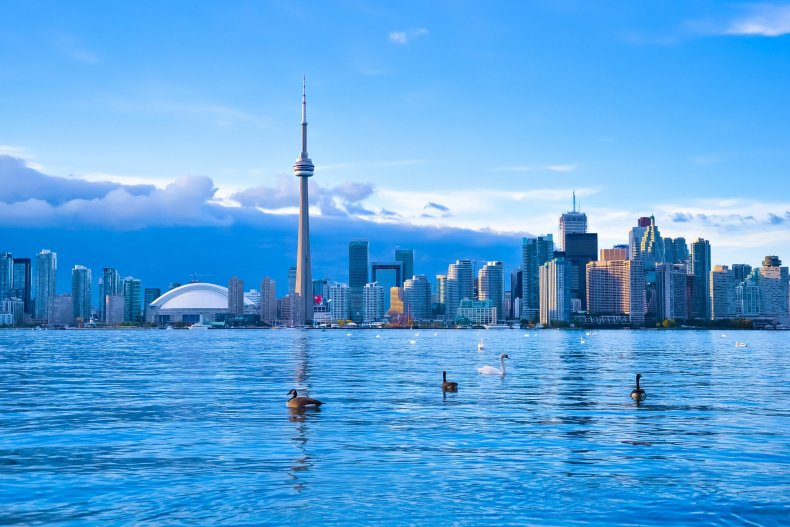

#8. Опечатки
Опечатки в значениях категориальных признаков приводят к таким же проблемам, как и разные регистры символов.

##8.1. Как обнаружить?

В нашем наборе данных о недвижимости опечаток нет, поэтому для демонстрации принципов работы с опечатками создадим новый набор.

В нем будет признак city, а его значениями будут torontoo и tronto. В обоих случаях это опечатки, а правильное значение – toronto.

Простой способ идентификации опечаток – **нечеткая логика** или **редактирование на основе расстояния**. Суть этого метода заключается в измерении количества букв (расстояния), которые нам нужно изменить, чтобы из одного слова получить другое.

Предположим, нам известно, что в признаке city должно находиться одно из четырех значений: toronto, vancouver, montreal или calgary. Мы вычисляем расстояние между всеми значениями и словом toronto (и vancouver).

Те слова, в которых содержатся опечатки, имеют меньшее расстояние с правильным словом, так как отличаются всего на пару букв.

In [ ]:
from nltk.metrics import edit_distance

df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})


df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'toronto'))
df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'vancouver'))
df_city_ex

city  city_distance_toronto  city_distance_vancouver
0   torontoo                      1                        8
1    toronto                      0                        8
2     tronto                      1                        8
3  vancouver                      8                        0
4   vancover                      7                        1
5   vancouvr                      7                        1
6   montreal                      7                        8
7    calgary                      7                        8

##8.2. Что делать?
Мы можем установить критерии для преобразования этих опечаток в правильные значения.

Например, если расстояние некоторого значения от слова toronto не превышает 2 буквы, мы преобразуем это значение в правильное – toronto.

In [ ]:
#Запустите свой код здесь




In [ ]:
#@title Проверьте себя:

msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

city  city_distance_toronto  city_distance_vancouver
0    toronto                      1                        8
1    toronto                      0                        8
2    toronto                      1                        8
3  vancouver                      8                        0
4  vancouver                      7                        1
5  vancouver                      7                        1
6   montreal                      7                        8
7    calgary                      7                        8

#9. Адреса
Адреса – реальная проблемма для всех аналитиков данных. Ведь мало кто следует стандартному формату, вводя свой адрес в базу данных.

##9.1. Как обнаружить?
Проще предположить, что проблема разных форматов адреса точно существует. Даже если визуально вы не обнаружили ошибок в этом признаке, все равно стоит стандартизировать их для надежности.

В нашем наборе данных по соображениям конфиденциальности отсутствует признак адреса, поэтому создадим новый набор df_add_ex:

In [ ]:
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

address
0   123 MAIN St Apartment 15
1  123 Main Street Apt 12   
2               543 FirSt Av
3             876 FIRst Ave.

#9.2. Что мы можем сделать делать?

**Форматирование данных** обычно включает следующие операции:

приведение всех символов к нижнему регистру;

удаление пробелов в начале и конце строки;

удаление точек;

стандартизация формулировок: в случае с адресами это - замена street на st, apartment на apt и т. д.



**Задание**

Стандартизируйте адрес, выполнив следующие операции:


1. Создайте новый столбец 'address_std' в датафрейме `df_add_ex`, который будет содержать стандартизированные версии адресов.
Строковые значения в столбце 'address' приведите к нижнему регистру с помощью метода `str.lower()`.

Ваш код должен выглядеть следующим образом:

 `df_add_ex['address_std'] = df_add_ex['address'].str.lower()`

2. Примените метод `str.strip()`, чтобы удалить лишние пробелы в начале и конце каждой строки в столбце 'address_std'.

3. Примените метод `str.replace('\\.', '')`, чтобы заменить все точки в строках столбца 'address_std' на пустые строки, то есть удалите точки из адресов.

4. Примените метод `str.replace('\\bstreet\\b', 'st')` для замены всех слов "street" (с учетом границ слова) в адресах на сокращенное обозначение "st".

5. Примените метод `str.replace('\\bapartment\\b', 'apt')` для замены слова "apartment" (с учетом границ слова) на сокращенную версию "apt".

6. Примените метод `str.replace('\\bav\\b', 'ave')` заменить слово "av" (с учетом границ слова) на "ave", что является стандартнымм сокращением "avenue".

7. Выведите изменный датафрейм `df_add_ex`
   

In [ ]:
#Введите и запустите код здесь:

In [ ]:
#@title Проверьте себя:

df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip()
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '')
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st')
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt')
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave')

df_add_ex

address               address_std
0   123 MAIN St Apartment 15  123 main st apartment 15
1  123 Main Street Apt 12       123 main street apt 12
2               543 FirSt Av              543 first av
3             876 FIRst Ave.            876 first ave.

#Несколько важных моментов, которые стоило бы упомянуть:

1. Если вы будете производить заполнение пропусков на всём датасете сразу, это может привести к утечке тестовых данных в тренировочные.

2. z оценка и квартили могут использоваться в случае нормально распределенных признаков, в других случаях данным методам доверять несколько рискованно.